# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [7]:
import numpy as np
import scipy as sc
from scipy import optimize as op
import matplotlib.pyplot as plt


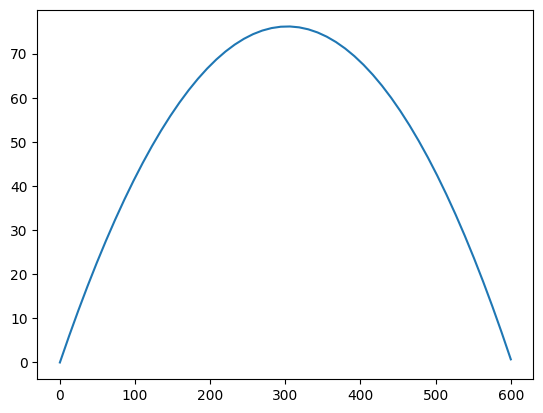

In [121]:
def funci(R,theta1,v0,b):
  g= 9.8
  theta = np.deg2rad(theta1)

  y1= ((g/b)+v0*np.sin(theta))*(R/v0*np.cos(theta))
  y2= (g/b**2)*np.log(1-(R*b/v0*np.cos(theta)))
  return y1+y2
R=np.linspace(0,600)
plt.plot(R,funci(R,45,55,0.005))


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}


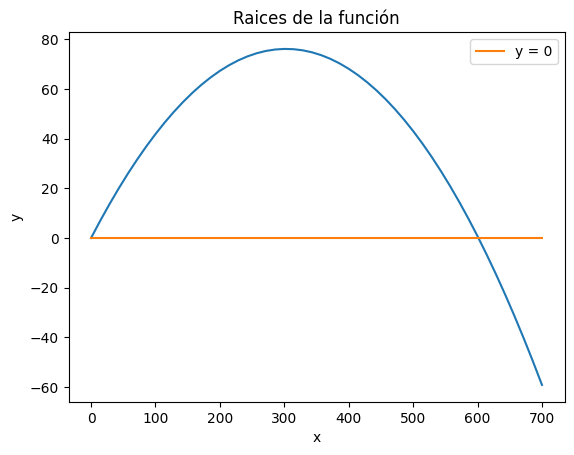

In [122]:
#para hallar el alcance máximo utilizaremos metodo de la secante, sabemos que se alcanza cuando y=0
#Primero graficamos para aproximar un punto inicial
v0=55
b= 0.005
theta=45
R=np.linspace(0,700)
funci(R,theta,v0,b)
plt.plot(R,funci(R,theta,v0,b))
y = [0] * len(R)

# Grafica la recta y = 0
plt.plot(R, y, label='y = 0')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Raices de la función')
plt.legend()


In [123]:

#Hallar el alcance máximo con metodo de la secante
def funcinew(R):
  b= 0.005
  g= 9.8
  v0=55
  theta=np.deg2rad(45)
  y1= ((g/b)+v0*np.sin(theta))*(R/v0*np.cos(theta))
  y2= (g/b**2)*np.log(1-(R*b/v0*np.cos(theta)))
  return y1+y2

Almax= op.newton(funcinew,550)
# La raiz es aprox 600
print("El alcance máximo es",Almax, "metros")


El alcance máximo es 601.3841533863574 metros


In [136]:
#validemos la respuesta anterior utilzando bisección
AlmaxBic = op.bisect(funcinew,550,650)
#Definimos una la funcion del tiempo de vuelo:
def tiempvu(R,v0,b):
  theta=np.deg2rad(45)
  tv=(-1/b)*np.log(1-(R*b/v0*np.cos(theta)))
  return tv
tiempVue= tiempvu(Almax,55,0.005)

print("EL alcance con el metodo de la bisección es", AlmaxBic, "metros, y el tiempo de vuelo es de", tiempVue, "segundos")


EL alcance con el metodo de la bisección es 601.384153386384 metros, y el tiempo de vuelo es de 7.88510183316388 segundos



\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


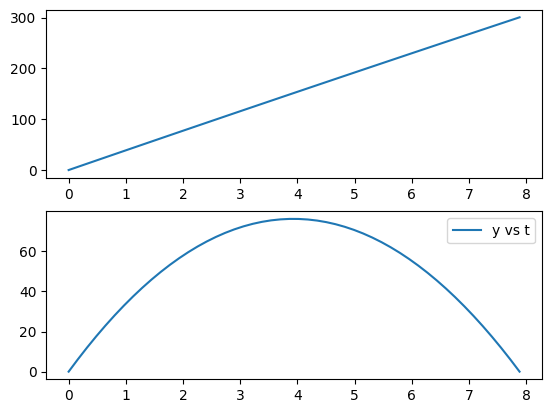

In [140]:
def trayX(t):
    theta=np.deg2rad(45)
    b=0.005
    v0=55
    x= (v0*np.cos(theta)/b)*(1-np.exp(-b*t))
    return x

def trayY(t):
    theta=np.deg2rad(45)
    g=9.8
    b=0.005
    v0=55
    y= ((1/b)*((g/b)+v0*np.sin(theta))*(1-np.exp(-b*t)))
    y2= -(g/b)*t
    return y+y2
t=np.linspace(0,tiempVue)

fig, axs = plt.subplots(2)
axs[0].plot(t,trayX(t), label='x vs t')
axs[1].plot(t,trayY(t), label='y vs t')
plt.legend()

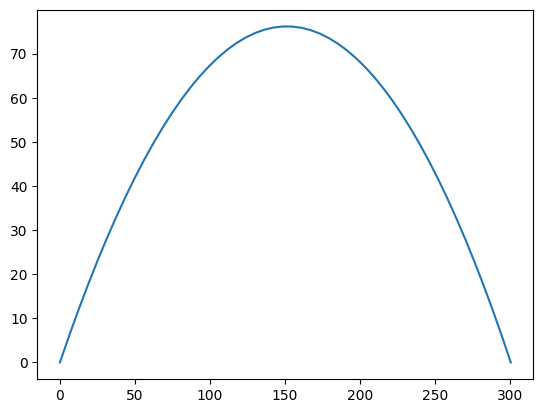

In [130]:
plt.plot(trayX(t),trayY(t), label='x,y')


Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```

In [159]:
def funciongeneral(R,theta1):
  g=9.8
  b2=0.009
  v02=40
  theta=np.deg2rad(theta1)
  y1= ((g/b)+v0*np.sin(theta))*(R/v0*np.cos(theta))
  y2= (g/b**2)*np.log(1-(R*b/v0*np.cos(theta)))
  return y1+y2

Almax= op.newton(funcinew,550)
b2=0.009
v02=40
theta= np.arange(0,90,5)
angulos= np.zeros(len(theta))
alcan_max=np.zeros(len(theta))
contador=0
for i in theta:
  alcan_max1=op.newton(funciongeneral(R,i),500)
  alcan_max[contador]=alcan_max1
  contador=contador+1

for i in range(0,len(theta)):
  print(f'para la {theta[i]} se tiene un alacnce maximo de  {alcan_max[i]}')


TypeError: 'numpy.ndarray' object is not callable

In [154]:
theta= np.arange(0,90,5)
theta

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85])